# Statistics Assignment with interactive data. 
##  Part 1
Create an interactive plot on a jupyter notebook using `ipywidgets` where you
* can select between the any 3 different batsmen data that has been provided to you at https://prabhuramachandran.github.io/pml. 
* can choose to show all 3 batsmen also. Hint: maybe call this option `"all"`.
* choose between a histogram or box plot or a violin plot.
* also have options for the histogram bins (all the available binning strategies, 'auto', 'fd', 'doane', 'scott' etc.), whether it is to use density or cumulative.

Ashish Trivedi

In [44]:
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

player_dict = {
  "Sachin": 0,
  "Kohli": 1,
  "Sehwag": 2,
    "all": 3
}
data = []
data.append( np.loadtxt("..\\data\\sachin.txt"))
data.append(np.loadtxt("..\\data\\kohli.txt"))
data.append(np.loadtxt("..\\data\\sehwag.txt"))
data.append([data[0], data[1], data[2]])

legends = ["Sachin","Kohli","Sehwag",["Sachin","Kohli","Sehwag"]]


@interact (player_name=["Sachin", "Kohli", "Sehwag", "all"], plot_type=["histogram", "box plot", "violin plot"], 
           bins=[ 'auto', 'fd', 'doane','scott', 'stone', 'rice', 'sturges', 'sqrt'])
def part1_assignment(player_name="all", plot_type="histogram", bins="auto",density=True, cumulative=True):
    print(player_name, plot_type, bins)

    print(f" player name {player_name}, data length = {len(data[0])}")
    print(f"data length = {len(data[player_dict[player_name]])} legend len = {len(legends[player_dict[player_name]])}")

    if plot_type == "histogram":
        if player_name == "all":
            plt.hist(data[0], bins = bins, density=density, cumulative=cumulative, label=legends[0], alpha=0.6)
            plt.hist(data[1], bins = bins, density=density, cumulative=cumulative, label=legends[1], alpha=0.6)
            plt.hist(data[2], bins = bins, density=density, cumulative=cumulative, label=legends[2], alpha=0.6)
            plt.legend()
        else:
            plt.hist(data[player_dict[player_name]], bins = bins, density=density, cumulative=cumulative, label=player_name)
        plt.xlabel("Range of runs")
        plt.ylabel("Frequency")
    elif plot_type == "box plot":
        plt.boxplot(data[player_dict[player_name]], showmeans=True)
        if player_name == "all":
            plt.xticks(["Sachin","Kohli","Sehwag"])
        else:
            plt.xticks(player_dict[player_name])
    elif plot_type == "violin plot":
        plt.violinplot(data[player_dict[player_name]], showmeans=True)
        if player_name == "all":
            plt.xticks(np.arange(4), ["","Sachin","Kohli","Sehwag"])
            plt.xlabel("players")
        else:
            plt.xlabel(player_name)
        plt.ylabel("runs")
    plt.show()        

interactive(children=(Dropdown(description='player_name', index=3, options=('Sachin', 'Kohli', 'Sehwag', 'all'…


## Part 2

1. Write a function that returns the PMF for a batsman's data given their scores as a numpy array.
2. Write another function that finds the cumulative distribution values.
3. Write a function to compute probabilities in a range (a, b) given the PMF/CDF. You can consider a function that is given the PMF data (either CDF/PMF/PDF) and the two limits of the range, for example: probability(batsman_data, a, b), where "a, b" are the limits of the range

Use these functions and also suitable statistical plots to analyse the performance of at least 3 different batsmen from the data given to you. Make some conclusions about the batsmen based on this.

 using np.histogram pmf [0.23333333 0.23333333 0.11666667 0.11666667 0.23333333 0.11666667
 0.11666667]  bins [1.         1.85714286 2.71428571 3.57142857 4.42857143 5.28571429
 6.14285714 7.        ]
 PMF approach 1 [0.23333333 0.23333333 0.11666667 0.11666667 0.23333333 0.11666667
 0.11666667]
 PMF approach 2  [[1, 0.2], [2, 0.2], [3, 0.1], [4, 0.1], [5, 0.2], [6, 0.1], [7, 0.1]]
 cdf  [0.2 0.4 0.5 0.6 0.8 0.9 1. ]
probability of players getting runs between 10 and 50
 Sachin = f0.3915929203539822
 kohli = f0.32068965517241416
 sehwag = f0.48979591836734704


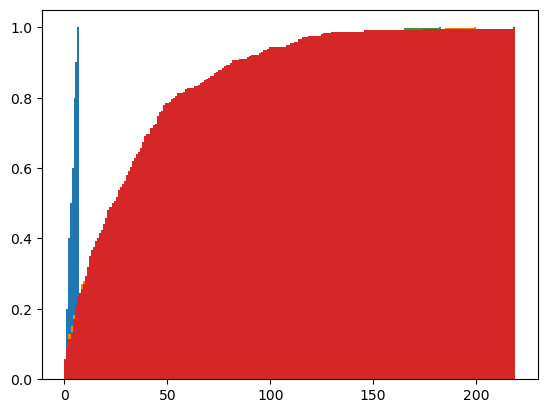

In [88]:
def get_pmf(batsman_score: np.array):
    ''' use np histogram to get PMF '''

    pmf_array,bins = np.histogram(batsman_score, bins = max(batsman_score)+1-min(batsman_score), density=True)
    print(f' using np.histogram pmf {pmf_array}  bins {bins}')

    # can be used as well 
    # pmf_array = plt.hist(batsman_score, bins = max(batsman_score)+1-min(batsman_score), density=True)
    # print(f' using plt.hist pmf {pmf_array}')

    return pmf_array

# another way to get the same using programming logic
def get_pmf_v2(batsman_score: np.array):
    ''' creates and returns pmf array for all elements of input np array
    returns 2-D array where first column is actual value and second column is
    probability. If return value is [[1,0.6], [2,0.4]] means, array had two
    unique value 1 and 2, which has probability of 0.6 and 0.4 respectively.
    '''
    unique_val, counts = np.unique(batsman_score, return_counts=True)
    # print(f" length = {len(batsman_score)} list = {batsman_score}")
    # print(f" unique values = {unique_val}, counts = {counts}")
    result = []
    index = 0
    for index in range(len(unique_val)):
        result.append( [int(unique_val[index]),float(counts[index]/len(batsman_score))])
    return result

def get_cdf(batsman_score: np.array):
    ''' use np histogram to get cumulative density function (CDF)'''
    cdf_list, b, p = plt.hist(batsman_score, bins = int(max(batsman_score)+1-min(batsman_score)), density=True, cumulative=True)
    # print(f' using plt.hist pmc {cdf_list}')

    return cdf_list

def probability_in_range(batsman_score, low_val, high_val):
    if low_val < min(batsman_score):
        low_val = min(batsman_score)
    if high_val > max(batsman_score):
        high_val = max(batsman_score)
    # print(f"max {max(batsman_score)}, min {min(batsman_score)}")
    cdf_list = get_cdf(batsman_score)
    ret_val = cdf_list[high_val]- cdf_list[low_val]
    return ret_val

# trial run for small data
data1 = np.array([1,2,3,1,2,4,5,6,5,7])
print(' PMF approach 1',get_pmf(data1))
print(' PMF approach 2 ',get_pmf_v2(data1))
print(' cdf ',get_cdf(data1))

# player wise data
sachin_data = np.loadtxt("..\\data\\sachin.txt")
kohli_data = np.loadtxt("..\\data\\kohli.txt")
sehwag_data = np.loadtxt("..\\data\\sehwag.txt")

print("probability of players getting runs between 10 and 50")
print(f" Sachin = f{probability_in_range(sachin_data, 10,50)}")
print(f" kohli = f{probability_in_range(kohli_data, 10,50)}")
print(f" sehwag = f{probability_in_range(sehwag_data, 10,50)}");

# test code temp code

In [8]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

In [9]:
from ipywidgets import interact

@interact(run=(0,200))
def part1_assignment(player_name="Kohli", plot_type="histogram", bins="auto", run=0):
    print(player_name, plot_type, bins, run)

interactive(children=(Text(value='Kohli', description='player_name'), Text(value='histogram', description='plo…

In [2]:
from ipywidgets import interact

@interact(x=(0,10))
def f(x=5):
    print(x)

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

In [1]:
!where python

C:\Users\AshishLaptop\anaconda3\python.exe
C:\Users\AshishLaptop\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\AshishLaptop\AppData\Local\Microsoft\WindowsApps\python.exe


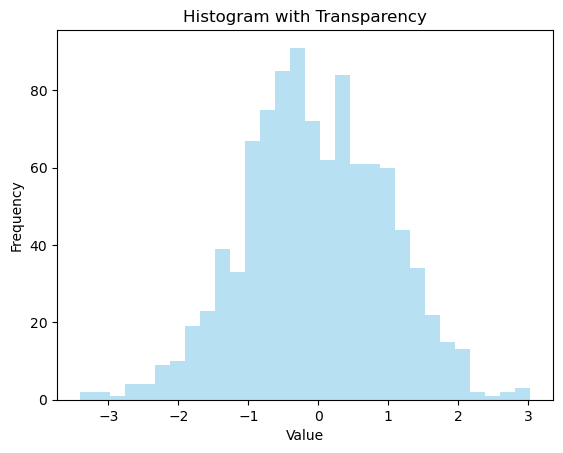

In [38]:
# Generate some random data
data1 = np.random.randn(1000)

# Create a histogram with transparency
plt.hist(data1, bins=30, color='skyblue', alpha=0.6)

# Add labels and a title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram with Transparency')

# Display the plot
plt.show()

In [48]:
print(help(np.ndarray))

Help on class ndarray in module numpy:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any 